# Machine Learning Project for Decision Tree

We are exploring the social media plafform usage in accorance with age against the preferal platform.The Data in this project is not real it just a clean data intended to explore the conception inf Decison tree machine learning. 

## Machine learning steps
### Step 1: Load the data

In [12]:
import pandas as pd
social = pd.read_csv("socialUsage.csv", header=0, sep=";")
social.head(5)

,age,gender,social
0,20,1,tiktok
1,23,1,tiktok
2,25,1,tiktok
3,26,1,facebook
4,29,1,facebook


### Step 2: Create Input Variable 

In [48]:
X = social.drop(columns=['social'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,30,1
7,31,1
8,33,1
9,20,0


### Step 3: Create Predict Variable 

In [49]:
y = social[['social']]
y

,social
0,tiktok
1,tiktok
2,tiktok
3,facebook
4,facebook
5,facebook
6,Twitter
7,Twitter
8,Twitter
9,Instagram


### STEP 4: learnind & Predicting Model

We are going to build a model that can predict our dataset to make a decision. There are so many algorithums out there and each algorithum has pros and cons in terms of output and performance. 

Apart from that we don't need to pay time for coding algorithums. We have pre-build module. The one we need right now to use is the library of Sklearn.

- sklearn: Library
- tree: Module
- DecisionTreeClassifier: Class (This implement decison Tree algorithum)

In [50]:
#Import the library that create the predicting model
from sklearn.tree import DecisionTreeClassifier #!pip install sklearn / !pip install scikit-learn --upgrade
                                                

In [51]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [52]:
social.head(5)

,age,gender,social
0,20,1,tiktok
1,23,1,tiktok
2,25,1,tiktok
3,26,1,facebook
4,29,1,facebook


### STEP 5: CREATE AN ALGORITHUM 

In [53]:
predictions = model.predict([[21, 1], [22, 0]])
predictions

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['tiktok', 'Instagram'], dtype=object)

That above code predict that **21 years old male** will usually like to use ***tiktok***, while **22 years old female** will prefer using ***instagram***. 

### STEP 6: CALCULATE TEH ACCURACY 

It is no an easy tasks to have 100% correct prediction of your models. But we may get too close prediction. To find the best prediction, we need to split our dataset into train & test data and use approperity some functions. 

In [63]:
#1 Import the library 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #This split data into train & test data
from sklearn.metrics import accuracy_score
import joblib as jb

#2 Import data 
social = pd.read_csv('socialUsage.csv', header=0, sep=';')

#3 Create input and predict variables. 
X = social.drop(columns=['social'])
y = social['social']

#2. Split the data into two 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#3 create a instance of the DecisionTreeclassifier by assigning a model variable
model = DecisionTreeClassifier()

#4. Train the model
model.fit(X_train, y_train)

#5. Predict the model
predictions = model.predict(X_test)

#6. Evaluate model
score = accuracy_score(y_test, predictions)
score

0.25

## Persisting Models

In [64]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib as jb

model = DecisionTreeClassifier()
model.fit(X, y)

model = jb.dump(model, 'socialUage-recommender.joblib')

In [56]:
model

['socialUage-recommender.joblib']

## Re-use the train model
We are not always training a model. So we will uncomments the data.

In [66]:
model = jb.load('socialUage-recommender.joblib') # This is the name file name stored the model
predictions = model.predict([[28, 1], [28, 0]])
predictions

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['facebook', 'whatsapp'], dtype=object)

## Vizualization Decision Tree 

We talked about that Decision Tree is the easiest way of machine learning prediciton.
We are going to import our model and demonstrate as visual Decision tree to make prediction. 

In [67]:
import pandas as pd
from sklearn import tree

#2 Import data 
social = pd.read_csv('socialUsage.csv', header=0, sep=';')

#3 Create input and predict variables. 
X = social.drop(columns=['social'])
y = social['social']

tree.export_graphviz(model, out_file='socialUage-recommender.dot',
                    feature_names=['age', 'gender'],
                    class_names=sorted(y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

Now, let us open in VSC code to see the vizualition of our Decison Tree model prediction. To get the outcome we need to install the plugin of dot and select graphic visual. 

- Open the dot file in VSC 
- In the upper right cornor, open the three dots and select *Open preview side to the size.*

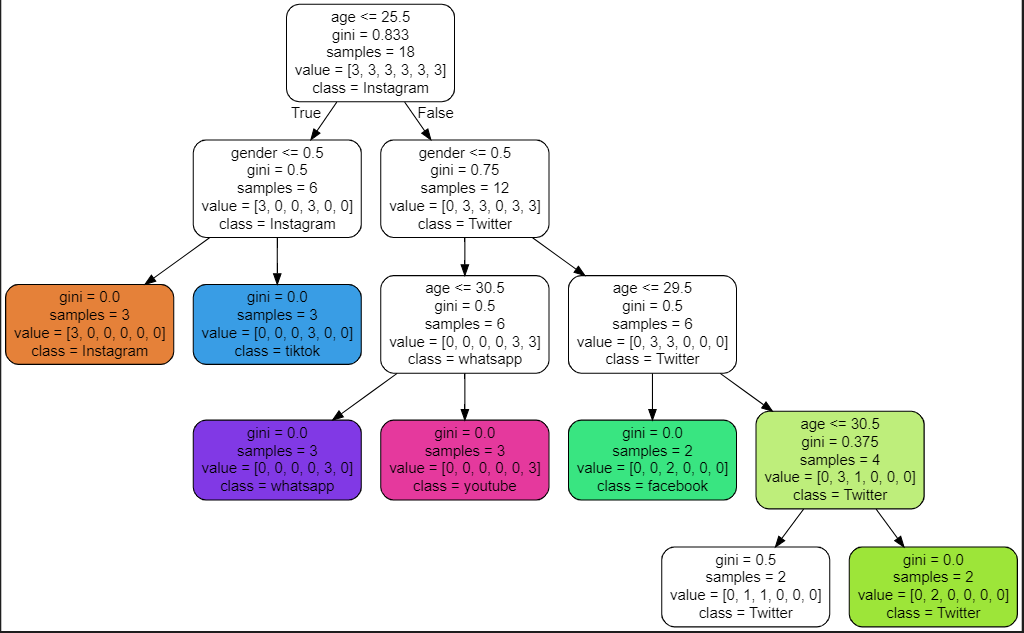